The dip test measures multimodality in a sample by the maximum difference, over all sample points, between the empirical distribution function, and the unimodal distribution function that minimizes that maximum difference. Other than unimodality, it makes no further assumptions about the form of the null distribution.

- The Dip Test of Unimodality. J. A. Hartigan, P. M. Hartigan 
  https://projecteuclid.org/journals/annals-of-statistics/volume-13/issue-1/The-Dip-Test-of-Unimodality/10.1214/aos/1176346577.full

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, norm
import diptest

# generate some bimodal random draws
size_data = 1000

parameters = np.array([[-5, 1],
                       [-0.7,  1],
                        [-1,  1]])
weights = np.array([0.3, 0.4, 0.3])
    
mixture = np.random.choice(len(weights), size = size_data, replace=True, p = weights)
data = np.array([norm.rvs(*(parameters[j])) for j in mixture])
   
    # both the dip statistic and p-value
dip, pval = diptest.diptest(data)

print("p-value : Reject 1 mod", 1-pval)

p-value : Reject 1 mod 0.9999559878316364


No handles with labels found to put in legend.


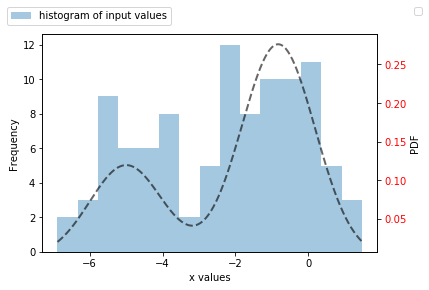

In [28]:
def plotHistogramAndPdf(data):
    x = np.linspace(np.min(data),np.max(data), len(data)-1)
    ax = plt.gca()
    plt.hist(data, bins = 15, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    #plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))

x = np.linspace(np.min(data),np.max(data), 1000)
f = np.zeros_like(x)
for (l, s), w in zip(parameters , weights):
    f += norm.pdf(x, loc=l, scale=s) * w

plotHistogramAndPdf(data)
plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
plt.show()

